<a href="https://colab.research.google.com/github/jugernaut/MACTI-analisisnumerico/blob/main/07_CuadraturaNumerica/01_IntegracionNumerica/teacher/01_IntegracionNumerica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Integral Numérica</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M. en C. Miguel Angel Pérez León.</i></h5>
    <h5 align="center"><i>Ayudante: Diana Laura Rojas Cristino.</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico.</i></h5>
  </font>

# Introducción

Muy frecuentemente es necesario evaluar la integral definida de una función $f\left(x\right)$ en un intervalo $\left[a,b\right]$. El objetivo de esta sección es encontrar métodos para aproximar la integral

$$\int_{a}^{b}f\left(x\right)dx$$

Si se conoce a priori la **antiderivada** $F\left(x\right)$ entonces es evidente que podemos encontrar el valor exacto de la integral, aplicando el siguiente teorema


## Teorema Fundamental de Cálculo

Sea $f\left(x\right)$ integrable en el intervalo $\left[a,b\right]$ y $F'\left(x\right)=f\left(x\right)$ entonces,$\int_{a}^{b}f\left(x\right)dx=F\left(b\right)-F\left(a\right)$


Sin embargo como en otras partes del curso, a veces encontrar a $F$ es muy complicado, de tal manera que la mejor opción es encontrar una aproximación del valor exacto de.

$$\int_{a}^{b}f\left(x\right)dx$$

La forma básica para encontrar una aproximación de $\int_{a}^{b}f\left(x\right)dx$, se conoce como **cuadratura numérica** y emplea una suma del tipo.

$$\sum_{i=0}^{n}a_{i}f\left(x_{i}\right)$$

Existen diferentes aproximaciones de la integral de $f\left(x\right)$ mediante cuadratura numérica, en esta sección revisaremos algunas de las mas comunes.

# Cuadratura Numérica

Los métodos de integración numérica se basan en los polinomios de Lagrange visto en secciones previas. La idea básica es que seleccionamos un conjunto de nodos distintos $x_{0},\ldots,x_{n}$ del intervalo $ \left[a,b\right]$. Después se integra el polinomio de Lagrange

$$P_{n}\left(x\right)=\sum_{i=0}^{n}f\left(x_{i}\right)L_{i}\left(x\right)$$

Y también se integra el termino de error de truncamiento en $\left[a,b\right]$

$$\prod_{i=0}^{n}\left(x-x_{i}\right)\frac{f^{\left(n+1\right)}\left(\xi\left(x\right)\right)}{\left(n+1\right)!}dx$$

De tal manera que obtenemos

$$ \int_{a}^{b}f\left(x\right)dx=\int_{a}^{b}\sum_{i=0}^{n}f\left(x_{i}\right)L_{i}\left(x\right)dx+\int_{a}^{b}\prod_{i=0}^{n}\left(x-x_{i}\right)\frac{f^{\left(n+1\right)}\left(\xi\left(x\right)\right)}{\left(n+1\right)!}dx\\=\sum_{i=0}^{n}a_{i}f\left(x_{i}\right)+\frac{1}{\left(n+1\right)!}\int_{a}^{b}\prod_{i=0}^{n}\left(x-x_{i}\right)f^{\left(n+1\right)}\left(\xi\left(x\right)\right)dx $$

Donde $\xi\left(x\right)$ se encuentra en $\left[a,b\right]$ para cada $x$ y

$$a_{i}=\int_{a}^{b}L_{i}\left(x\right)dx,\quad para\,cada\,i=0,1,\ldots,n$$

Por lo tanto, la formula de la cuadratura es

$$\int_{a}^{b}f\left(x\right)dx=\sum_{i=0}^{n}a_{i}f\left(x_{i}\right) \tag{1}$$

Con un error dado por

$$E\left(f\right)=\frac{1}{\left(n+1\right)!}\int_{a}^{b}\prod_{i=0}^{n}\left(x-x_{i}\right)f^{\left(n+1\right)}\left(\xi\left(x\right)\right)dx$$

De la misma manera que en otros temas vistos en el curso, la aproximación será más exacta si subdividimos el intervalo $\left[a,b\right]$ en tantos subintervalos como sea necesario, es decir

Sea

$$\left[a,b\right]=\left[a,x_{1}\right]\cup\left[x_{1},x_{2}\right]\cup\cdots\cup\left[x_{n-2},x_{n-1}\right]\cup\left[x_{n-1},b\right]$$

Donde

$$x_{k}=a+\frac{b-a}{n}k,\quad n=0,1,2,\ldots,n,\quad x_{0}=a,\,x_{n}=b$$


Tendremos

$$\int_{a}^{b}f\left(x\right)dx=\int_{a}^{x_{1}}f\left(x\right)dx+\cdots+\int_{x_{k}}^{x_{k+1}}f\left(x\right)dx+\cdots+\int_{x_{n-1}}^{b}f\left(x\right)dx \tag{2} $$

Observación, todos los nodos son igualmente espaciados.



### Cuadratura del rectángulo

La forma de cuadratura mas simple es la que emplea rectángulos de base $\left(b-a\right)$ y altura $f\left(a\right)$

$$\int_{a}^{b}f\left(x\right)dx=\left(b-a\right)f\left(a\right)+E\left(f\right) \tag{3}$$

Combinando $(1)$ y $(3)$, se obtiene la forma general de la cuadratura mediante rectángulos

$$\int_{a}^{b}f\left(x\right)dx=\frac{b-a}{n}\sum_{i=0}^{n-1}f\left(x_{i}\right)+E\left(f\right)$$



interactive(children=(IntSlider(value=1, description='n', max=30, min=1), Output()), _dom_classes=('widget-int…

<function __main__.Rectangulo(n)>

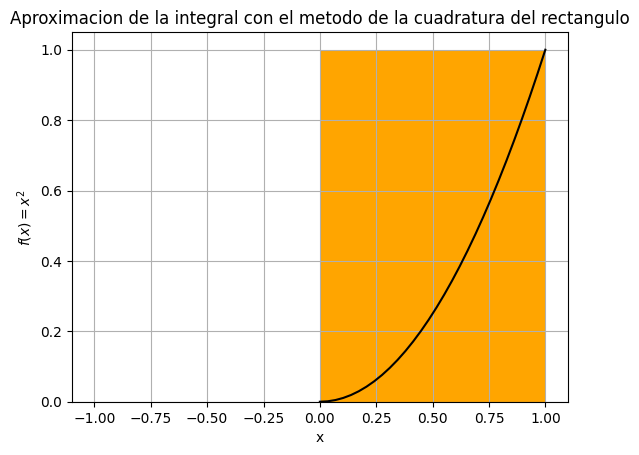

In [ ]:
# import de las bibliotecas necesarias
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt

# funcion que define la cuadratura mediante rectangulos
# cantidad de puntos que usaran en la cuadratura
def Rectangulo(n):
    # a punto inicial del intervalo
    a=0
    # b punto final del intervalo
    b=1
    # f funcion a integrar **
    #def f(x):
        #return x*x
    # f funcion a integrar
    f = lambda x: x*x
    # circunferencia
    #f = lambda x: np.sqrt(1-x*x)

    # para grficar f(x)
    xp=np.linspace(a,b,30)
    fp=f(xp)
    plt.plot(xp,fp,color='black')

    # discretizacion para la cuadratura
    x=np.linspace(a,b,n+1)
    fx=[ f(x[i]) for i in range(len(x))]
    plt.bar(x,fx,width=(-(b-a)/n),color='orange', align='edge')
    plt.title("Aproximacion de la integral con el metodo de la cuadratura del rectangulo")
    plt.xlabel("x")
    plt.ylabel(r"$f \left(x\right) = x^{2}$")
    plt.grid()

    # aproximacion mediante la cuadratura del rectangulo
    cuadratura=0.0
    for i in range (len(x)):
        cuadratura+=f(x[i])
    # valor aproximado
    integral=((b-a)/n)*cuadratura

    print("el valor de la integral mediante el metodo de cuadratura del rectangulo es: {}".format(integral))

interact(Rectangulo,n=widgets.IntSlider(min=1,max=30,step=1,value=1))

### Cuadratura del punto medio

Una aproximación de la integral $\int_{a}^{b}f\left(x\right)dx$ consiste en aproximar el área bajo la curva $y=f\left(x\right)$ por un rectángulo de base $b-a$ y altura $f\left(\frac{a+b}{2}\right)$, entonces

$$\int_{a}^{b}f\left(x\right)dx=\left(b-a\right)f\left(\frac{a+b}{2}\right)+E\left(f\right) \tag{4} $$

Donde $E\left(f\right)$, si $f$ tiene primera y segunda derivada continuas en $\left[a,b\right]$, se expresa así

$$E\left(f\right)=\frac{\left(b-a\right)^{2}}{2}f''\left(\xi\right)\quad\xi\in\left[a,b\right]$$

Combinando $(1)$ y $(4)$, se obtiene la forma general de la cuadratura del punto medio

$$\int_{a}^{b}f\left(x\right)dx=\frac{b-a}{n}\sum_{i=0}^{n-1}f\left(\frac{x_{i}+x_{i+1}}{2}\right)+E\left(f\right)$$



interactive(children=(IntSlider(value=1, description='n', max=30, min=1), Output()), _dom_classes=('widget-int…

<function __main__.PuntoMedio(n)>

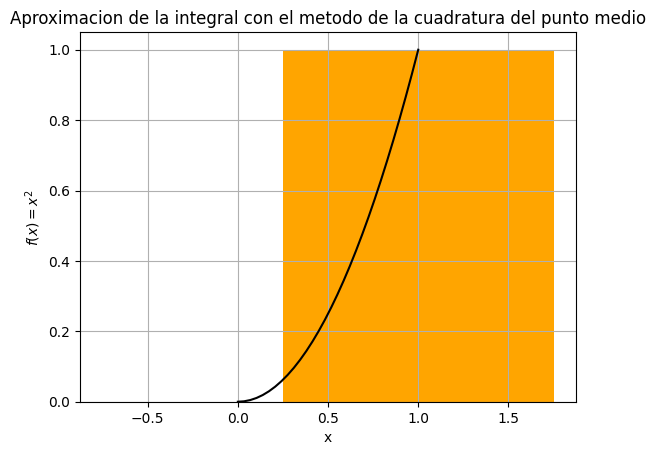

In [ ]:
def PuntoMedio(n):
    # a punto inicial del intervalo
    a=0
    # b punto final del intervalo
    b=1
    # f funcion a integrar **
    #def f(x):
        #return x*x
    # f funcion a integrar
    f = lambda x: x*x

    # para grficar f(x)
    xp=np.linspace(a,b,30)
    fp=f(xp)
    plt.plot(xp,fp,color='black')

    # discretizacion para la cuadratura
    x=np.linspace(a,b,n+1)
    am = a+(float(a)/2)
    bm = b+(float(b)/2)
    fx=[ f(x[i]) for i in range(len(x))]
    plt.bar(x,fx,width=((bm-am)/n),color='orange')
    plt.title("Aproximacion de la integral con el metodo de la cuadratura del punto medio")
    plt.xlabel("x")
    plt.ylabel(r"$f \left(x\right) = x^{2}$")
    plt.grid()

    # aproximacion mediante la cuadratura del punto medio
    cuadratura=0.0
    for i in range (len(x)-1):
        cuadratura+=f( (x[i]+x[i+1])/2 )
    # valor aproximado
    integral=((b-a)/n)*cuadratura

    print("el valor de la integral mediante el metodo de cuadratura del punto medio es: {}".format(integral))

interact(PuntoMedio,n=widgets.IntSlider(min=1,max=30,step=1,value=1))

### Cuadratura del trapecio

Area del trapecio.

$$A=\left(\frac{B+b}{2}\right)h$$

Para derivar la regla del trapecio para aproximar $\int_{a}^{b}f\left(x\right)dx$, tomemos $x_{0}=a,\,x_{1}=b,\,h=b-a$ y calculando el polinomio lineal de Lagrange

$$P\left(x\right)=\left(\frac{x-x_{1}}{x_{0}-x_{1}}\right)f(x_{0})+\left(\frac{x-x_{0}}{x_{1}-x_{0}}\right)f(x_{1})$$

Al integrar este polinomio se tiene

$$\int_{a}^{b}f\left(x\right)dx=\int_{x_{0}}^{x_{1}}\left[\left(\frac{x-x_{1}}{x_{0}-x_{1}}\right)f(x_{0})+\left(\frac{x-x_{0}}{x_{1}-x_{0}}\right)f(x_{1})\right]dx\\+\frac{1}{2}\int_{x_{0}}^{x_{1}}f''\left(\xi\left(x\right)\right)\left(x-x_{0}\right)\left(x-x_{1}\right)dx$$

Donde la integral del error es $-\frac{h^{3}}{12}f''\left(\xi\right)$, lo que nos lleva a la forma general de la cuadratura del trapecio

$$\int_{a}^{b}f\left(x\right)dx=\left[\frac{x-x_{1}}{2\left(x_{0}-x_{1}\right)}f(x_{0})+\frac{x-x_{0}}{2\left(x_{1}-x_{0}\right)}f(x_{1})\right]_{x_{0}}^{x_{1}}-\frac{h^{3}}{12}f''\left(\xi\right)\\=\frac{\left(x_{1}-x_{0}\right)}{2}\left[f\left(x_{0}\right)+f\left(x_{1}\right)\right]-\frac{h^{3}}{12}f''\left(\xi\right) $$

Tomando en cuenta que $h=x_{1}-x_{0}$, obtenemos la forma general de la cuadratura del trapecio

$$\int_{a}^{b}f\left(x\right)dx=\frac{h}{2}\left[f\left(x_{0}\right)+f\left(x_{1}\right)\right]-\frac{h^{3}}{12}f''\left(\xi\right)$$



In [ ]:
def Trapecio():
    # a punto inicial del intervalo
    # b punto final del intervalo
    # f funcion a integrar
    a=0
    b=1
    def f(x):
        return x*x

    integral=((b-a)/2)*(f(a)+f(b))
    print("el valor de la integral mediante el metodo de cuadratura del Trapecio: {}".format(integral))

Trapecio()

el valor de la integral mediante el metodo de cuadratura del Trapecio: 0.5


### Cuadratura del trapecio compuesto

Sean los nodos $a=x_{0}<x_{1}<\cdots<x_{n}=b$ con $h_{i}=x_{i+1}-x_{i}$ y lo que se busca es aproximar el valor de $\int_{a}^{b}f\left(x\right)dx$. Ademas aprovechamos el hecho de que

$$\int_{a}^{b}f\left(x\right)dx	=	\int_{a}^{c}f\left(x\right)dx+\int_{c}^{b}f\left(x\right)dx$$

Integrando sobre los subintervalos $\left[x_{i},x_{i+1}\right]$, para $i=0,\ldots,n-1$ y aplicando la regla del trapecio simple, se obtiene

$$\int_{a}^{b}f\left(x\right)dx=\sum_{i=0}^{n-1}\int_{x_{i}}^{x_{i+1}}f\left(x\right)=\sum_{i=0}^{n-1}\frac{h_{i}}{2}\left[f\left(x_{i}\right)+f\left(x_{i+1}\right)\right]-\sum_{i=0}^{n-1}\frac{h_{i}^{3}}{12}f''\left(\xi_{i}\right),\quad\xi_{i}\in\left(x_{i+1},x_{i}\right) $$

Si consideramos $h=h_{i}$ para $i=0,\ldots,n-1$ y $f''\left(x\right)$ continua, entonces obtenemos el error total

$$E_{T}=-\frac{h^{3}}{12}\sum_{i=0}^{n-1}f''\left(\xi_{i}\right)=-\frac{h^{3}}{12}nf''\left(\xi\right)=-\frac{h^{2}}{12}nhf''\left(\xi\right)$$

Donde $\xi\in\left(x_{0},x_{n}\right)$ y $h=\frac{x_{n}-x_{0}}{n}$ entonces $E_{T}=-\frac{h^{2}}{12}\left(x_{n}-x_{0}\right)f''\left(\xi\right)$, es decir

$$ \int_{a}^{b}f\left(x\right)dx=\frac{h}{2}\left[f\left(x_{0}\right)+2f\left(x_{1}\right)+\cdots+2f\left(x_{n-1}\right)+f\left(x_{n}\right)\right]-\frac{h^{2}}{12}\left(x_{n}-x_{0}\right)f''\left(\xi\right)$$

Así que

$$\int_{a}^{b}f\left(x\right)dx=\frac{h}{2}\left[f\left(a\right)+2\sum_{i=1}^{n-1}f\left(x_{i}\right)+f\left(b\right)\right]-\frac{b-a}{12}h^{2}f''\left(\xi\right)$$

Es la forma general de la cuadratura del trapecio compuesto.



interactive(children=(IntSlider(value=1, description='n', max=30, min=1), Output()), _dom_classes=('widget-int…

<function __main__.TrapecioCompuesto(n)>

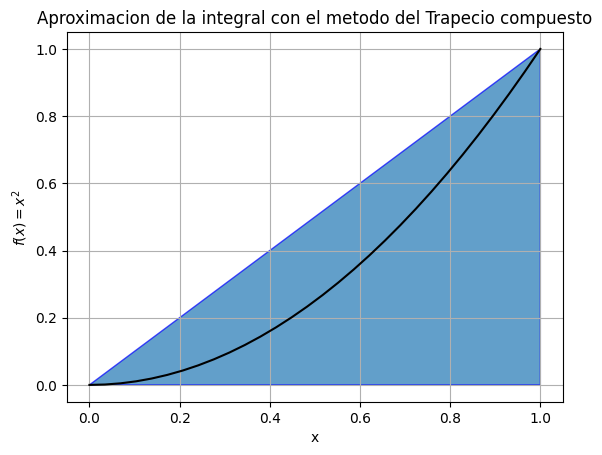

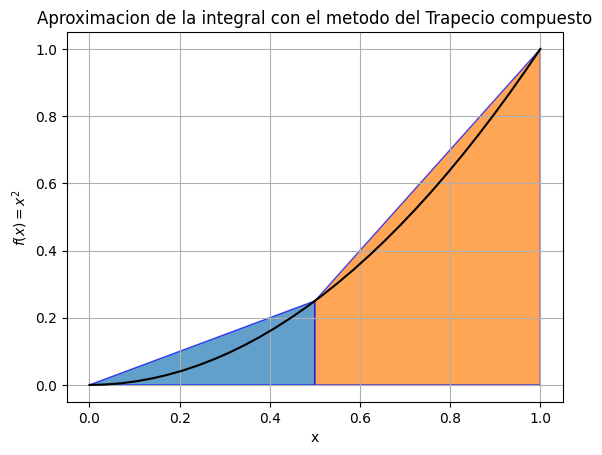

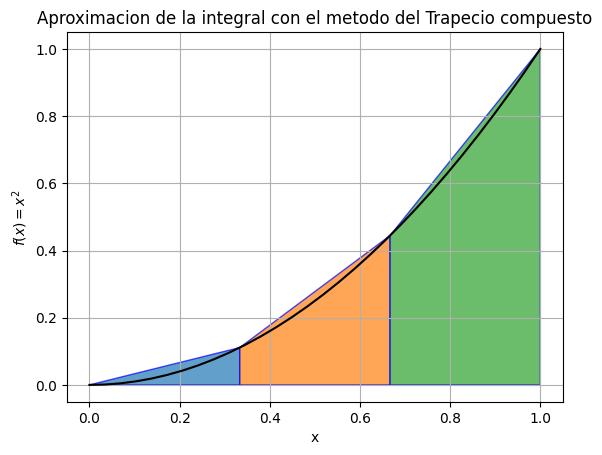

In [ ]:
def TrapecioCompuesto(n):
    # n los puntos que se usaran para integrar
    # a punto inicial del intervalo
    a=0
    # b punto final del intervalo
    b=1
    # f funcion a integrar
    f = lambda x:x*x
    # grafica de f(x)
    xp=np.linspace(a,b,30)
    fp=f(xp)
    plt.plot(xp,fp,color='black')
    # se grafican los trapecios
    x=np.linspace(a,b,n+1)
    for i in range(n):
      xs = [x[i],x[i],x[i+1],x[i+1]]
      ys = [0,f(x[i]),f(x[i+1]),0]
      plt.fill(xs,ys,alpha=0.7,edgecolor='b')
    # datos de la grafica
    plt.title("Aproximacion de la integral con el metodo del Trapecio compuesto")
    plt.xlabel("x")
    plt.ylabel(r"$f \left(x\right) = x^{2}$")
    plt.grid()
    # formula del trapecio compuesto
    cuadratura=0.0
    for i in range (1,len(x)-1):
        cuadratura+=f( x[i])

    integral=((b-a)/(2*n))*(2*cuadratura+f(a)+f(b))

    print("el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: {}".format(integral))

interact(TrapecioCompuesto,n=widgets.IntSlider(min=1,max=30,step=1,value=1))

### Cuadratura de Simpson $\frac{1}{3}$

Se obtiene al integrar en $\left[a,b\right]$ el segundo polinomio de Lagrange con los nodos $x_{0}=a,\,x_{1}=a+h$ y $x_{2}=b$ donde $h=\frac{b-a}{2}$

$$\int_{a}^{b}f\left(x\right)dx=\int_{x_{0}}^{x_{2}}\left[\frac{\left(x-x_{1}\right)\left(x-x_{2}\right)}{\left(x_{0}-x_{1}\right)\left(x_{0}-x_{2}\right)}f(x_{0})+\frac{\left(x-x_{0}\right)\left(x-x_{2}\right)}{\left(x_{1}-x_{0}\right)\left(x_{1}-x_{2}\right)}f(x_{1})\right]\\+\int_{x_{0}}^{x_{2}}\left[\frac{\left(x-x_{0}\right)\left(x-x_{1}\right)}{\left(x_{2}-x_{0}\right)\left(x_{2}-x_{1}\right)}f(x_{2})\right]\\+\frac{1}{6}\int_{x_{0}}^{x_{2}}f'''\left(\xi\left(x\right)\right)\left(x-x_{0}\right)\left(x-x_{1}\right)\left(x-x_{2}\right)dx $$

Sin embargo, al deducir la regla de Simpson de esta manera, unicamente se obtiene un término de error $O\left(h^{4}\right)$ que contiene a $f^{\left(3\right)}$. Pero si construimos la regla de otra forma, podemos deducir un termino de orden superior que incluya a $f^{\left(4\right)}$

Supongamos que $f$ se expande mediante el tercer polinomio de Taylor alrededor de $x_{1}$. Entonces, para cada $x$ en $\left[x_{0},x_{2}\right]$, existe un número $\xi\left(x\right)\in\left(x_{0},x_{2}\right)$ tal que

$$f\left(x\right)=f\left(x_{1}\right)+f'\left(x_{1}\right)\left(x-x_{1}\right)+\frac{f''\left(x_{1}\right)\left(x-x_{1}\right)^{2}}{2!}\\+\frac{f'''\left(x_{1}\right)\left(x-x_{1}\right)^{3}}{3!}+\frac{f^{\left(4\right)}\left(\xi\left(x\right)\right)\left(x-x_{1}\right)^{4}}{4!}$$

Si $h=\left(x-x_{1}\right)$ entonces

$$\int_{x_{0}}^{x_{2}}f\left(x\right)dx=\left[f\left(x_{1}\right)h+\frac{f'\left(x_{1}\right)h^{2}}{2!}+\frac{f''\left(x_{1}\right)h^{3}}{3!}+\frac{f^{\left(3\right)}\left(x_{1}\right)h^{4}}{4!}\right]_{x_{0}}^{x_{2}}+\frac{1}{24}\int_{x_{0}}^{x_{2}}f^{\left(4\right)}\left(\xi\left(x\right)\right)h^{4}dx \tag{5}$$

Puesto que $\left(x-x_{1}\right)^{4}$ nunca es negativo en $\left[x_{0},x_{2}\right]$ y por el Teorema del Valor Medio ponderado, entonces

$$\frac{1}{24}\int_{x_{0}}^{x_{2}}f^{\left(4\right)}\left(\xi\left(x\right)\right)h^{4}dx=\frac{f^{\left(4\right)}\left(\xi_{1}\right)}{24}\int_{x_{0}}^{x_{2}}h^{4}dx=\frac{f^{\left(4\right)}\left(\xi_{1}\right)}{120}h^{5}\mid_{x_{0}}^{x2}$$

Para algún número $\xi_{1}\in\left(x_{0},x_{2}\right)$. Pero por otro lado $h=x_{2}-x_{1}=x_{1}-x_{0}$, así que

$$\left(x_{2}-x_{1}\right)^{2}-\left(x_{1}-x_{0}\right)^{2}=\left(x_{2}-x_{1}\right)^{4}-\left(x_{1}-x_{0}\right)^{4}=0 $$

Mientras que

$$\left(x_{2}-x_{1}\right)^{3}-\left(x_{1}-x_{0}\right)^{3}=2h^{3} \quad y \quad \left(x_{2}-x_{1}\right)^{5}-\left(x_{1}-x_{0}\right)^{5}=2h^{5}$$

Así que (5), se puede reescribir así

$$\int_{x_{0}}^{x_{2}}f\left(x\right)dx=2hf\left(x_{1}\right)+\frac{h^{3}f''\left(x_{1}\right)}{3}+\frac{f^{\left(4\right)}\left(\xi_{1}\right)h^{5}}{60}$$

Pero si ahora reemplazamos $f''\left(x_{1}\right)$ por su aproximación en diferencias finitas, se tiene

$$\int_{x_{0}}^{x_{2}}f\left(x\right)dx=2hf\left(x_{1}\right)+\frac{h^{3}}{3}\left\{ \frac{1}{h^{2}}\left[f\left(x_{0}\right)-2f\left(x_{1}\right)+f\left(x_{2}\right)\right]-\frac{h^{2}}{12}f^{\left(4\right)}\left(\xi_{2}\right)\right\} \\+\frac{f^{\left(4\right)}\left(\xi_{1}\right)h^{5}}{60}\\=\frac{h}{3}\left[f\left(x_{0}\right)+4f\left(x_{1}\right)+f\left(x_{2}\right)\right]-\frac{h^{5}}{12}\left[\frac{1}{3}f^{\left(4\right)}\left(\xi_{2}\right)-\frac{1}{5}f^{\left(4\right)}\left(\xi_{1}\right)\right] $$

Así tenemos que

$$\int_{x_{0}}^{x_{2}}f\left(x\right)dx=\frac{h}{3}\left[f\left(x_{0}\right)+4f\left(x_{1}\right)+f\left(x_{2}\right)\right]-\frac{h^{5}}{90}f^{\left(4\right)}\left(\xi_{1}\right)$$

Es la forma general de la regla de Simpson $\frac{1}{3}$


#### Ejemplo

La regla del trapecio para una función $f$ en el intervalo $\left[0,2\right]$ es

$$\int_{0}^{2}f\left(x\right)dx\approx f\left(0\right)+f\left(2\right)$$

y la regla de Simpson para $f$ en $\left[0,2\right]$ es

$$\int_{0}^{2}f\left(x\right)dx\approx\frac{1}{3}\left[f\left(0\right)+4f\left(1\right)+f\left(2\right)\right] $$

Calcular las correspondientes aproximaciones para

$$x^{2},x^{4},\frac{1}{\left(x+1\right)},\,\sqrt{1+x^{2}},\,sen\,x,\,e^{x}$$

Notar como en todos los casos, la regla de Simpson, proporciona una mejor aproximación.

| $f\left(x\right)$        | $x^{2}$ |  $x^{4}$ | $\frac{1}{x+1}$|$\sqrt{1+x^{2}}$ |sen x |$e^{x}$ |
| :-:  | :-: | :-: |  :-: | :-:  |   :-: |   :-: |
| Valores exactos  | 2.667 |6.400 |1.099 |2.958 |1.416 |6.389 |
| Trapecio | 4.00	|16.00	|1.333|	3.326|	0.909|	8.389|
| Simpson	|2.667|	6.667|	1.111|	2.964|	1.425|	6.421|

In [ ]:
#@title
def Simpson1_3():
    # x0 punto inicial del intervalo
    # x2 punto final del intervalo
    # f funcion a integrar
    x0=0
    x2=1
    h=(x2-x0)/2
    x1=x0+h

    def f(x):
        return x*x

    integral=(h/3)*(f(x0)+4*f(x1)+f(x2))

    print("el valor de la integral mediante el metodo de cuadratura del  Simpson 1/3: {}".format(integral))

Simpson1_3()

el valor de la integral mediante el metodo de cuadratura del  Simpson 1/3: 0.3333333333333333


In [ ]:
import numpy as np

def Simpson1_3():
    # x0 punto inicial del intervalo
    # x2 punto final del intervalo
    # f funcion a integrar
    x0=0
    x2=2
    h=(x2-x0)/2
    x1=x0+h

    f1 = lambda x: x*x
    f2 = lambda x: x**(4)
    f3 = lambda x: 1/(x+1)
    f4 = lambda x: np.sqrt(1+x*x)
    f5 = lambda x: np.sin(x)
    f6 = lambda x: np.exp(x)

    integral1=(h/3)*(f1(x0)+4*f1(x1)+f1(x2))
    integral2=(h/3)*(f2(x0)+4*f2(x1)+f2(x2))
    integral3=(h/3)*(f3(x0)+4*f3(x1)+f3(x2))
    integral4=(h/3)*(f4(x0)+4*f4(x1)+f4(x2))
    integral5=(h/3)*(f5(x0)+4*f5(x1)+f5(x2))
    integral6=(h/3)*(f6(x0)+4*f6(x1)+f6(x2))

    print("el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: {}".format(integral1))
    print("el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: {}".format(integral2))
    print("el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: {}".format(integral3))
    print("el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: {}".format(integral4))
    print("el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: {}".format(integral5))
    print("el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: {}".format(integral6))


Simpson1_3()

el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: 2.6666666666666665
el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: 6.666666666666666
el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: 1.1111111111111112
el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: 2.9643074089973895
el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: 1.4250604553524227
el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: 6.42072780425561


### Cuadratura de Simpson $\frac{3}{8}$

Esta regla se obtiene al integra el tercer polinomio de Lagrange en $\left[a,b\right]$ tomando los nodos $x_{0}=a,\,x_{1}=a+h,\,x_{2}=a+2h$ y $x_{3}=b$ donde $h=\frac{b-a}{3}$ es decir

$$\int_{a}^{b}f\left(x\right)dx\approx\int_{a}^{b}P_{3}\left(x\right)dx=\frac{3h}{8} \left[f\left(x_{0}\right)+3f\left(x_{1}\right)+3f\left(x_{2}\right)+f\left(x_{3}\right)\right]$$

Es importante notar que esta regla es una suma ponderada de los valores de $f\left(x\right)$ en los dos puntos finales $x_{0}=a$ y $x_{3}=b$, y los dos puntos $x_{1},x_{2}$ divide el intervalo en tres partes iguales.



In [ ]:
def Simpson3_8():
    # x0 punto inicial del intervalo
    # x3 punto final del intervalo
    # f funcion a integrar
    x0=0
    x3=1
    h=(x3-x0)/3
    x1=x0+h
    x2=x0+2*h
    def f(x):
        return x*x

    integral=(3/8)*h*(f(x0)+3*f(x1)+3*f(x2)+f(x3))

    print("el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: {}".format(integral))

Simpson3_8()

el valor de la integral mediante el metodo de cuadratura del  Trapecio Compuesto es: 0.3333333333333333


# Cuadratura Gaussiana

Las reglas vista en la sección anterior, también son conocidas como reglas de Newton-Cotes, se dedujeron integrando los polinomios de interpolación.

El termino de error en el polinomio de interpolación de grado n contiene la $\left(n+1\right)-esima$ derivada.

En todas las formulas de Newton-Cotes se emplean valores de la función equidistantes. Este procedimiento es adecuado cuando las reglas son combinadas para crear nuevas reglas compuestas, como las vistas con anterioridad.

Sin embargo la restricción que pide a los nodo ser equidistantes, puede afectar considerablemente la exactitud de la aproximación.

La cuadratura Gaussiana optimiza la forma de seleccionar los puntos a ser evaluados y no los toma en forma igualmente espaciada como se había visto en las reglas de Newton-Cotes.

Se escogen los nodos $x_{1},x_{2},\ldots,x_{n}$ en el intervalo $\left[a,b\right]$ y los coeficientes $c_{1},c_{2},\ldots c_{n}$ para reducir en lo posible el error esperado que se obtiene al efectuar la aproximación

$$ \int_{a}^{b}f\left(x\right)dx\approx\sum_{i=1}^{n}c_{i}f\left(x_{i}\right)$$

Los coeficientes (pesos) $c_{1},c_{2},\ldots c_{n}$ son arbitrarios y los nodos (puntos de Gauss) $x_{1},x_{2},\ldots,x_{n}$ están restringidos a pertenecer al intervalo $\left[a,b\right]$.

Esto nos da $2n$ parámetros de donde elegir. Considerando la clase de polinomios de grado máximo $2n-1$ también contiene $2n$ parámetros, si es que los coeficientes de un polinomio se consideran parámetros.

Esta clase de polinomios es la más amplia para la cual es razonable esperar que la regla devuelva un resultado exacto.

Se mostrará cómo seleccionar los coeficientes y los nodos cuando $n=2$ y cuando el intervalo de integración es $\left[-1,1\right]$

Después se explicara el caso mas general de una elección arbitraria de puntos y pesos, indicando como modificar el método cuando se integra en un intervalo arbitrario.



## Cuadratura Gaussiana con $n=2$ puntos

Supongamos que se requiere determinar $c_{1},c_{2},x_{1},x_{2}$ de modo que la regla de integración

$$\int_{-1}^{1}f\left(x\right)dx\approx c_{1}f\left(x_{1}\right)+c_{2}f\left(x_{2}\right)$$

proporcione el resultado exacto siempre que $f\left(x\right)$ sea un polinomio de grado $2\left(2\right)-1=3$ o menor, es decir que sea un polinomio de la forma

$$ f\left(x\right)=a_{0}+a_{1}x+a_{2}x^{2}+a_{3}x^{3} $$

Dado que

$$\int f\left(x\right)dx=a_{0}\int1dx+a_{1}\int xdx+a_{2}\int x^{2}dx+a_{3}\int x^{3}dx $$

esto equivale a demostrar que la regla produce resultados exactos cuando $f\left(x\right)$ es $1,x,x^{2},x^{3}$

Necesitamos $c_{1},c_{2},x_{1},x_{2}$ de manera tal que

$$\begin{array}{cc}
{\color{blue}{(a)}}\,c_{1}*1+c_{2}*1=\int_{-1}^{1}1dx=2\quad & {\color{blue}{(b)}}\,c_{1}x_{1}+c_{2}x_{2}=\int_{-1}^{1}xdx=0\\
{\color{blue}{(c)}}\,c_{1}x_{1}^{2}+c_{2}x_{2}^{2}=\int_{-1}^{1}x^{2}dx=\frac{2}{3} & {\color{blue}{(d)}}\,c_{1}x_{1}^{3}+c_{2}x_{2}^{3}=\int_{-1}^{1}x^{3}dx=0
\end{array}$$

Las 4 incógnitas se puede determinar comenzando con $(b)$

$$c_{2}=-\frac{c_{1}x_{1}}{x_{2}} \tag{6}$$

Ahora substituyendo en $(d)$ se tiene

$$c_{1}x_{1}^{3}-c_{1}x_{1}x_{2}^{2}=0\,\Rightarrow\,x_{1}^{2}=x_{2}^{2}$$

Pero $x_{1}\neq x_{2}$ por lo tanto se tiene que

$$x_{1}=-x_{2} \tag{7}$$

Ahora substituyendo $x_{1}$ en $(6)$, tenemos que $c_{1}=c_{2}$ y usando $(a)$

$$ c_{1}=c_{2}=1 \tag{8}$$

Si se substituye $(7)$ y $(8)$ en $(c)$ se tiene

$$x_{1}^{2}+x_{2}^{2}=\frac{2}{3}\,\Rightarrow\,x_{1}^{2}+x_{1}^{2}=\frac{2}{3}\,\Rightarrow\,2x_{1}^{2}=\frac{2}{3}\,\Rightarrow\,x_{1}^{2}=\frac{1}{3}$$

$$ \therefore x_{1}=\frac{1}{\sqrt{3}}$$

Así tenemos que

$$ c_{1}=1,\quad c_{2}=1,\quad x_{1}=\frac{1}{\sqrt{3}}\quad y \quad x_{2}=\frac{-1}{\sqrt{3}}$$

Así que la regla para 2 puntos es

$$\int_{-1}^{1}f\left(x\right)dx\approx 1f\left(\frac{1}{\sqrt{3}}\right)+1f\left(\frac{-1}{\sqrt{3}}\right) $$



|   n  puntos    | Coeficientes (pesos)  $C_{i}$  |   Puntos (integración) Gauss $x_{i}$ |
|  :-:   |  :-:  |  :-:  |  
| 2  | $c_{1}=c_{2}=1$      | $x_{1}=0.578\\x_{2}=-0.578$ |
| 3  | $c_{1}=0.556\\c_{2}=0.889\\c_{3}=0.556$ | $x_{1}=0.774\\x_{2}=0\\x_{3}=-0.774$ |



## Cuadratura Gaussiana general

Una integral $\int_{a}^{b}f\left(x\right)dx$ en un intervalo arbitrario $\left[a,b\right]$ se puede transformar en otra integral $\int_{-1}^{1}f\left(t\right)dt$ en $\left[-1,1\right]$ usando el cambio de variable

$$t=\frac{2x-a-b}{b-a}\Leftrightarrow x=\frac{1}{2}\left[\left(b-a\right)t+a+b\right] $$

Donde el diferencial de $x$ es $dx=\frac{1}{2}\left(b-a\right)dt$. Esto nos permite aplicar la cuadratura Gaussiana a cualquier intervalo $\left[a,b\right]$, ya que

$$ \int_{a}^{b}f\left(x\right)dx=\int_{-1}^{1}f\left(\frac{\left(b-a\right)t+\left(b+a\right)}{2}\right)\frac{\left(b-a\right)}{2}dt $$



### Ejemplo

Evalúe $\int_{0}^{3}e^{-x^{2}}dx$. Usando $n=3$ puntos. Encuentre el error, empleando el valor analítico.

El valor de la integral resolviendo de manera analíticamente es 0.886207.



In [ ]:
def CuaGauss():
    # a punto inicial del intervalo
    a = 0
    #a=0
    # b punto final del intervalo
    b = 3
    #b=1
    # puntos de Gauss
    x=np.array([0.774,0.0,-0.774])
    # pesos de Gauss
    c=np.array([0.556,0.889,0.556])
    # f funcion a integrar
    #f = lambda x:x*x
    f = lambda x: np.exp(-(x)**2)
    # acumulador
    cuadratura=0.0
    # constante de
    dx=(b-a)/2
    # por cada punto de integracion
    for i in range(len(x)):
        # nuevo punto de integracion
        changeVar=0.0
        changeVar=(((b-a)*x[i])+b+a)/2
        # se acumula la evualuacion de f en nuevo punto
        cuadratura+=c[i]*f(changeVar)

    integral=cuadratura*dx

    print("el resultad de la integral con una cuadratura de 3 puntos es :{}".format(integral))

CuaGauss()

el resultad de la integral con una cuadratura de 3 puntos es :0.8847093533668051


# Referencias

*   Riswan Butt, Numerical Analysys Using Matlab, Jones and Bartlett.
*   Ward Cheney, David Kincaid, Métodos Numéricos y Computación, Cenage Learning.
*   Richard L. Burden, J. Douglas Faires, Análisis Numérico, Math Learning.
*   Yuri N. Skiba, Introducción a los Métodos Numéricos.
*   Quarteroni, A, Sacco R.: Numerical mathematics, Springer. 2007.

